<a href="https://colab.research.google.com/github/ankit-rathi/Tradevesting_v2/blob/main/myStocks_Portfolio_Analysis_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyxirr

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import os
project_path = '/content/drive/My Drive/tradevesting'
os.chdir(project_path)

import warnings
warnings.filterwarnings('ignore')

from google.colab import data_table

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Run date time (IST): 2024-11-07 15:05:58
-------------------
qualified stocks: 87
with latest results: 83
still star stocks: 41
-------------------
Initial Investment:  98.12 L
CY Investment:  1.11 C
Reserve:  400.00
Current:  1.20 C
-------------------
Today PnL: -61.22 K (-0.51%)
Current PnL: -9.69 K (-0.09%)
CY Booked + Current PnL: 8.29 L (7.46%)
-------------------
Total profit:  8.74 L
Total loss:  -8.84 L
-------------------
Total Booked + Current PnL: 21.40 L (21.81%)
Total Booked PnL: 21.50 L (21.91%)
Curr Year Booked PnL: 8.39 L (7.0%)
Prev Year Booked PnL: 13.11 L (13.36%)
Est FTT:  1.89 C
Est FTT PnL: 68.75 L (57.39%)
-------------------
Est LTT:  2.37 C
Est LTT PnL: 1.17 C (98.08%)
Deployed:  98.12 L
Current:  1.20 C
CAGR/XIRR %: 19.58%


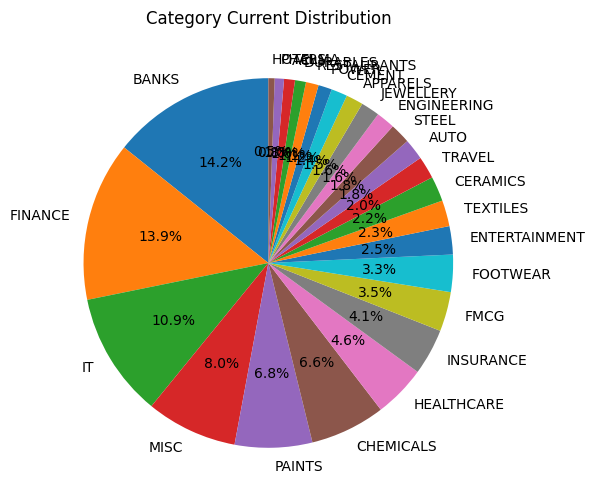

In [ ]:
# Import the function from the script
import myStocks_Portfolio_Analysis_v2

# Call the function to get the DataFrame
df_portfolio_features = myStocks_Portfolio_Analysis_v2.get_portfolio_features_v2()
cols = ['Symbol', 'AvgCost', 'Close', 'FTT', 'Dev%_PE', 'RSP', 'Current', 'Current P/L', 'FTT Amt', 'Today P/L%', 'Current P/L%', 'FTT%', 'OTT%', 'XIRR', 'RRR Ind', 'CurrAlloc%', 'Gained%', 'Criteria', 'Strategy', 'Category']
df_portfolio_features = df_portfolio_features[cols]

In [ ]:
# all portfolio
df_portfolio_features = df_portfolio_features.sort_values(by = 'FTT Amt', ascending=True)
data_table.DataTable(df_portfolio_features, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
31,HCLTECH,1349.00,1832.15,2006.00,45.88,82.76,137411.0,36236.0,13040.0,-0.34,35.82,9.49,48.70,86.0,2.78,1.15,51.16,X40,BTT,IT
86,WIPRO,401.00,563.20,611.00,32.49,88.51,237107.0,68286.0,20130.0,-0.12,40.45,8.49,52.37,29.0,3.39,1.98,48.80,XR,NTT,IT
76,TCS,4073.44,4148.05,4998.00,5.35,39.08,99553.0,1790.0,20398.0,0.20,1.83,20.49,22.70,10.0,0.09,0.83,26.60,X40,BTT,IT
49,LTIM,5051.49,5892.75,7262.39,19.30,22.99,94284.0,13460.0,21912.0,-1.63,16.65,23.24,43.77,10.0,0.61,0.79,29.86,X200,ATH,IT
47,LALPATHLAB,2519.90,3074.35,3689.00,-4.92,6.90,110677.0,19961.0,22124.0,-0.84,22.00,19.99,46.39,32.0,0.90,0.92,53.78,X40N,NTT,HEALTHCARE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,SAIL,130.64,123.72,228.00,59.34,19.54,213046.0,-11916.0,179576.0,-0.14,-5.30,84.29,74.53,20.0,-0.07,1.78,46.21,XSP,BTT,STEEL
18,CAMPUS,294.86,314.80,631.85,21.00,73.56,179121.0,11346.0,180393.0,3.26,6.76,100.71,114.29,1.0,0.06,1.50,46.76,XSP,ATH,FOOTWEAR
11,BANDHANBNK,223.20,181.45,400.00,-36.24,51.72,177277.0,-40789.0,213530.0,-0.97,-18.71,120.45,79.21,-19.0,-0.19,1.48,7.87,XSP,NTT,BANKS
74,TANLA,991.56,754.90,2007.31,-37.03,5.75,166833.0,-52302.0,276776.0,-1.97,-23.87,165.90,102.44,-29.0,-0.19,1.39,3.54,AR,ATH,IT


In [ ]:
# lower current allocation with minimal upside
tmp_df = df_portfolio_features[(df_portfolio_features['CurrAlloc%'] < 1) ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
76,TCS,4073.44,4148.05,4998.00,5.35,39.08,99553.0,1790.0,20398.0,0.20,1.83,20.49,22.70,10.0,0.09,0.83,26.60,X40,BTT,IT
49,LTIM,5051.49,5892.75,7262.39,19.30,22.99,94284.0,13460.0,21912.0,-1.63,16.65,23.24,43.77,10.0,0.61,0.79,29.86,X200,ATH,IT
47,LALPATHLAB,2519.90,3074.35,3689.00,-4.92,6.90,110677.0,19961.0,22124.0,-0.84,22.00,19.99,46.39,32.0,0.90,0.92,53.78,X40N,NTT,HEALTHCARE
15,BAYERCROP,4346.57,6641.65,8325.00,28.04,71.26,106266.0,36721.0,26938.0,-0.98,52.80,25.35,91.53,36.0,1.36,0.89,33.94,X40N,BTT,CHEMICALS
82,UNIONBANK,124.65,120.21,163.00,-6.30,87.36,96649.0,-3570.0,34407.0,-0.50,-3.56,35.60,30.77,-41.0,-0.10,0.81,18.70,XSP,NTT,BANKS
25,FINEORG,4771.46,5133.90,7168.71,2.36,77.01,87276.0,6161.0,34587.0,0.69,7.60,39.63,50.24,2.0,0.18,0.73,27.47,X40N,ATH,CHEMICALS
22,DABUR,523.35,534.05,735.00,-9.12,20.69,93459.0,1873.0,35169.0,-1.03,2.04,37.63,40.44,3.0,0.05,0.78,8.31,X40,BTT,FMCG
80,TTKPRESTIG,769.29,875.70,1149.24,26.59,47.13,114717.0,13940.0,35838.0,-0.65,13.83,31.24,49.39,17.0,0.39,0.96,31.77,X40N,ATH,DURABLES
7,ATULAUTO,656.09,615.55,844.00,NaN,63.22,97257.0,-6405.0,36092.0,0.10,-6.18,37.11,28.64,-48.0,-0.18,0.81,29.40,XSP,NTT,AUTO
23,DEN,52.79,48.90,75.00,-9.55,44.83,78240.0,-6224.0,41757.0,0.08,-7.37,53.37,42.07,-8.0,-0.15,0.65,14.04,AR,NTT,ENTERTAINMENT


In [ ]:
# XSP allocation
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XSP') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
41,JIOFIN,320.24,322.10,387.00,-7.39,26.44,159117.0,918.0,32062.0,-1.21,0.58,20.15,20.85,94.0,0.03,1.33,50.41,XSP,BTT,FINANCE
82,UNIONBANK,124.65,120.21,163.00,-6.30,87.36,96649.0,-3570.0,34407.0,-0.50,-3.56,35.60,30.77,-41.0,-0.10,0.81,18.70,XSP,NTT,BANKS
7,ATULAUTO,656.09,615.55,844.00,NaN,63.22,97257.0,-6405.0,36092.0,0.10,-6.18,37.11,28.64,-48.0,-0.18,0.81,29.40,XSP,NTT,AUTO
56,QUESS,716.17,717.75,986.00,-14.13,45.98,125606.0,276.0,46939.0,-0.54,0.22,37.37,37.68,5.0,0.01,1.05,65.18,XSP,NTT,MISC
16,BERGEPAINT,558.54,515.95,680.00,-31.96,11.49,163556.0,-13501.0,52011.0,-1.75,-7.63,31.80,21.75,-6.0,-0.26,1.37,13.95,XSP,NTT,PAINTS
68,SHALBY,271.92,232.53,327.00,NaN,8.05,128589.0,-21783.0,52246.0,-1.25,-14.49,40.63,20.26,-34.0,-0.42,1.07,8.19,XSP,NTT,HEALTHCARE
45,KANSAINER,299.63,279.75,340.00,-40.30,65.52,251775.0,-17892.0,54232.0,-2.07,-6.63,21.54,13.47,-12.0,-0.33,2.10,9.12,XSP,NTT,PAINTS
78,TITAGARH,1117.46,1206.85,1548.00,16.65,98.85,196717.0,14571.0,55612.0,-0.25,8.00,28.27,38.53,513.0,0.26,1.64,53.12,XSP,NTT,ENGINEERING
43,JPPOWER,18.73,18.78,26.20,-61.87,75.86,142221.0,379.0,56192.0,2.79,0.27,39.51,39.88,123.0,0.01,1.19,46.15,XSP,NTT,POWER
52,MEDANTA,1022.60,1086.80,1486.00,-3.51,97.70,165194.0,9759.0,60676.0,1.18,6.28,36.73,45.32,151.0,0.16,1.38,30.39,XSP,NTT,HEALTHCARE


In [ ]:
# XSP for average up
tmp_df = df_portfolio_features[(df_portfolio_features['Criteria'] == 'XSP') ]
data_table.DataTable(tmp_df, include_index=False)

,Symbol,AvgCost,Close,FTT,Dev%_PE,RSP,Current,Current P/L,FTT Amt,Today P/L%,Current P/L%,FTT%,OTT%,XIRR,RRR Ind,CurrAlloc%,Gained%,Criteria,Strategy,Category
41,JIOFIN,320.24,322.10,387.00,-7.39,26.44,159117.0,918.0,32062.0,-1.21,0.58,20.15,20.85,94.0,0.03,1.33,50.41,XSP,BTT,FINANCE
82,UNIONBANK,124.65,120.21,163.00,-6.30,87.36,96649.0,-3570.0,34407.0,-0.50,-3.56,35.60,30.77,-41.0,-0.10,0.81,18.70,XSP,NTT,BANKS
7,ATULAUTO,656.09,615.55,844.00,NaN,63.22,97257.0,-6405.0,36092.0,0.10,-6.18,37.11,28.64,-48.0,-0.18,0.81,29.40,XSP,NTT,AUTO
56,QUESS,716.17,717.75,986.00,-14.13,45.98,125606.0,276.0,46939.0,-0.54,0.22,37.37,37.68,5.0,0.01,1.05,65.18,XSP,NTT,MISC
16,BERGEPAINT,558.54,515.95,680.00,-31.96,11.49,163556.0,-13501.0,52011.0,-1.75,-7.63,31.80,21.75,-6.0,-0.26,1.37,13.95,XSP,NTT,PAINTS
68,SHALBY,271.92,232.53,327.00,NaN,8.05,128589.0,-21783.0,52246.0,-1.25,-14.49,40.63,20.26,-34.0,-0.42,1.07,8.19,XSP,NTT,HEALTHCARE
45,KANSAINER,299.63,279.75,340.00,-40.30,65.52,251775.0,-17892.0,54232.0,-2.07,-6.63,21.54,13.47,-12.0,-0.33,2.10,9.12,XSP,NTT,PAINTS
78,TITAGARH,1117.46,1206.85,1548.00,16.65,98.85,196717.0,14571.0,55612.0,-0.25,8.00,28.27,38.53,513.0,0.26,1.64,53.12,XSP,NTT,ENGINEERING
43,JPPOWER,18.73,18.78,26.20,-61.87,75.86,142221.0,379.0,56192.0,2.79,0.27,39.51,39.88,123.0,0.01,1.19,46.15,XSP,NTT,POWER
52,MEDANTA,1022.60,1086.80,1486.00,-3.51,97.70,165194.0,9759.0,60676.0,1.18,6.28,36.73,45.32,151.0,0.16,1.38,30.39,XSP,NTT,HEALTHCARE


In [ ]:
# Top N allocation
df_tmp = df_portfolio_features.sort_values(by = 'CurrAlloc%', ascending=False)
top_n_values = [10, 20, 30]

sum_df = pd.DataFrame({
    'Top_N': top_n_values,
    'Sum_Alloc%': [df_tmp['CurrAlloc%'].head(n).sum() for n in top_n_values]
})

sum_df

,Top_N,Sum_Alloc%
0,10,19.61
1,20,35.04
2,30,49.10


In [ ]:
# criteria-wise allocation
df_portfolio_features.groupby('Criteria')['CurrAlloc%'].sum().sort_values(ascending=False)

,CurrAlloc%
Criteria,
XSP,35.87
X40,21.06
XR,19.04
X40N,16.00
AR,5.67
SR,1.60
X200,0.79


In [ ]:
# sector-wise stats
df_tmp = df_portfolio_features.groupby('Category')[['CurrAlloc%', 'Current', 'Current P/L', 'FTT Amt']].sum().sort_values(by=['Current', 'Current P/L'], ascending=False)
df_tmp['Current P/L%'] = round(df_tmp['Current P/L'] * 100 / df_tmp['Current'], 2)
df_tmp['FTT%'] = round(df_tmp['FTT Amt'] * 100 / df_tmp['Current'], 2)
cols = ['CurrAlloc%', 'Current P/L%', 'FTT%']
df_tmp[cols].sort_values(by=['CurrAlloc%'], ascending=False)

,CurrAlloc%,Current P/L%,FTT%
Category,,,
BANKS,14.25,-6.27,61.15
FINANCE,13.96,-1.75,54.58
IT,10.92,5.87,47.40
MISC,7.98,-0.90,54.05
PAINTS,6.77,-1.43,31.45
CHEMICALS,6.58,8.00,51.90
HEALTHCARE,4.55,10.19,36.90
INSURANCE,4.05,6.50,43.15
FMCG,3.45,-1.76,40.30
